## Examples of using the Mondrian forest and tree classifiers (not online versions).

In [1]:
include("Mondrian_Forest_Classifier.jl")

show_mondrian_split_2d (generic function with 1 method)

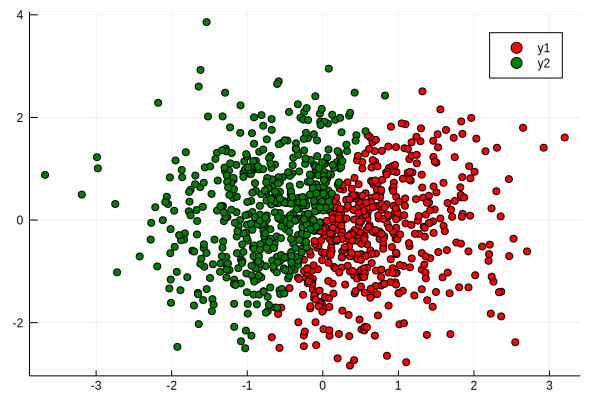

In [2]:
using MLBase
using Plots

X, Y, x, y = FakedataClassif(1000,2,1000);
Y = Y.+1;
y = y.+1;

if size(X,2)==2
    scatter(X[Y.==1,1],X[Y.==1,2], color="red")
    scatter!(X[Y.==2,1],X[Y.==2,2],color="green")
end

## Mondrian tree classifier

In [7]:
# initialise a mondreian tree classifier object with an empty tree
# and empty data. NB the underlying mondrian tree can be accessed by MT.Tree (see visualisation)
MT = Mondrian_Tree_Classifier()
# trains the tree and sets MT.X and MT.Y to the given training data
train!(MT,X,Y,1e9)

# predict on training and testing
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

# give the raw probs
predict_proba!(MT,x[1:10,:])

Train Accuracy
0.91
Accuracy
0.84


10-element Array{Any,1}:
 [0.545455, 0.454545]
 [0.545455, 0.454545]
 [0.0, 1.0]          
 [0.0, 1.0]          
 [0.0, 1.0]          
 [1.0, 0.0]          
 [0.545455, 0.454545]
 [0.166667, 0.833333]
 [0.545455, 0.454545]
 [0.0, 1.0]          

In [4]:
# the data has been added
println(MT.X[1:10,:])
println(MT.Y[1:10])

[0.5475 0.29761; -0.261604 -0.416495; 0.359905 -1.00125; -1.46102 -1.54115; 0.770325 -1.27802; -0.354169 1.49657; 0.107527 0.88409; 0.359197 -2.8357; -0.514819 -0.942034; -1.62282 0.641939]
[1, 2, 1, 2, 1, 2, 2, 1, 2, 2]


## Visualisation

Based on DecisionTree.jl print_tree function. TODO draw with Graphs.jl

In [5]:
MT = Mondrian_Tree_Classifier()
# low λ value to show the plotting
train!(MT,X,Y,0.6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# print the text based vis
print_mondrian_tree(get(MT.Tree.root))

Train Accuracy
0.806
τ: 0.092
L-> τ: 0.114
    L-> τ: 0.237
        L-> τ: 0.437
            L-> Prediction: [0.729, 0.271]
            R-> τ: 0.485
                L-> Prediction: [0.02, 0.98]
                R-> Prediction: [0.999, 0.001]
        R-> τ: 0.285
            L-> Prediction: [0.0, 1.0]
            R-> τ: 0.572
                L-> Prediction: [0.621, 0.379]
                R-> Prediction: [0.997, 0.003]
    R-> Prediction: [1.0, 0.0]
R-> τ: 0.111
    L-> τ: 0.168
        L-> Prediction: [0.0, 1.0]
        R-> τ: 0.185
            L-> τ: 0.565
                L-> Prediction: [0.004, 0.996]
                R-> Prediction: [0.75, 0.25]
            R-> τ: 0.209
                L-> Prediction: [0.0, 1.0]
                R-> τ: 0.333
                    L-> Prediction: [0.571, 0.429]
                    R-> Prediction: [0.998, 0.002]
    R-> τ: 0.149
        L-> Prediction: [0.0, 1.0]
        R-> τ: 0.203
            L-> τ: 0.295
                L-> Prediction: [0.726, 0.274]
  

### The splits can be visualised for an individual Mondrian_Tree_Classifier

Here a plot and animation are returned, plot is the final still. If animation=false
then a one frame animation and plot are returned (both the final plot).

In [9]:
X, Y, x, y = FakedataClassif(100,2,25);
Y = Y.+1;
y = y.+1;

MT = Mondrian_Tree_Classifier()
train!(MT,X,Y,1e6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# plots the splits for a Mondrian_Tree_Classifier in 2_d could do
# higher d but would only plot dimension 1,2
f,a = show_mondrian_split_2d(MT,Data=true,animation=true);
gif(a,"resources/MT.gif",fps=1)

Train Accuracy
0.93


INFO: Saved animation to /home/harvey/Group Project/warwick-rsg/MondrianForest/p.gif


Plots.AnimatedGif("/home/harvey/Group Project/warwick-rsg/MondrianForest/p.gif")

# Mondrian Forest classifier

Python has $\sim 27 - 33$ seconds runtime, $\sim 276-619$ MiB of memory allocations, and about $0.8-0.92$ accuracy on an
equivalent problem

See [python comparison](comparisons/python_comp.ipynb) and the plots below. S


![alt text](comparisons/n_tree_scale.png)

Yet to update data scale with paused mondrians and parallel training

![alt text](comparisons/n_data_scale.png)

In [6]:
X, Y, x, y = FakedataClassif(1000,5,100);
Y = Y.+1;
y = y.+1;

# creates a mondrian forest classifier with 100 mondrian tree classifiers
MF = Mondrian_Forest_Classifier(100)
# time and memory separately
tic()
train!(MF, X, Y, 1e9)
toc()
# prediction is greatest time hog
tic()
pred=predict!(MF, X);
toc()
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

MF = Mondrian_Forest_Classifier(100)
println("Allocations: ", @allocated(train!(MF,X,Y,1e9))/1e6, " Mb")

elapsed time: 0.411393544 seconds
elapsed time: 0.557767629 seconds
Train Accuracy
0.956
Accuracy
0.93
Allocations: 0.002416 Mb


In [7]:
predict_proba!(MF,x[1:10,:])

10-element Array{Array{Float64,1},1}:
 [0.328472, 0.671528]
 [0.476095, 0.523905]
 [0.472687, 0.527313]
 [0.513541, 0.486459]
 [0.684905, 0.315095]
 [0.593144, 0.406856]
 [0.415153, 0.584847]
 [0.406855, 0.593145]
 [0.412143, 0.587857]
 [0.448916, 0.551084]

# MLBase Gridtune

Something is wrong here

In [8]:
d=2
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

In [9]:
# Currently adding @parallel to the for loop in train! causes
# train! within MLBase's gridtune to be unable to modify the
# Mondrian_Forest_Classfier Trees array....
function train_for_mlbase!(MF::Mondrian_Forest_Classifier,
                X::Array{Float64,2},
                Y::Array{Int64},
                λ::Float64=1e9)

    for i in 1:MF.n_trees
        MT = Mondrian_Tree_Classifier()
        train!(MT, X, Y, λ)
        push!(MF.Trees,MT)
    end
    MF.X = X
    MF.Y = Y
end

function estfun(n_trees,λ)
    MF = Mondrian_Forest_Classifier()
    train_for_mlbase!(MF,X,Y,λ)
    return MF
end

function evalfun(MF)
    return correctrate(y, predict!(MF,x))
end

@time best_model, best_config, best_score = gridtune(estfun, 
                                               evalfun, 
                                               ("n_trees",[10,100,250,500]),
                                               ("λ",[1e1,1e2,1e4,1e8,1e16]),
                                               verbose=true
)
println("\nBest Configuration: ", best_config)
println("\nBest score: ", best_score)

[n_trees=10, λ=10.0] => 0.76
[n_trees=100, λ=10.0] => 0.75
[n_trees=250, λ=10.0] => 0.77
[n_trees=500, λ=10.0] => 0.76
[n_trees=10, λ=100.0] => 0.73
[n_trees=100, λ=100.0] => 0.76
[n_trees=250, λ=100.0] => 0.75
[n_trees=500, λ=100.0] => 0.76
[n_trees=10, λ=10000.0] => 0.8
[n_trees=100, λ=10000.0] => 0.74
[n_trees=250, λ=10000.0] => 0.76
[n_trees=500, λ=10000.0] => 0.76
[n_trees=10, λ=1.0e8] => 0.77
[n_trees=100, λ=1.0e8] => 0.76
[n_trees=250, λ=1.0e8] => 0.73
[n_trees=500, λ=1.0e8] => 0.78
[n_trees=10, λ=1.0e16] => 0.73
[n_trees=100, λ=1.0e16] => 0.76
[n_trees=250, λ=1.0e16] => 0.75
[n_trees=500, λ=1.0e16] => 0.74
  2.883790 seconds (24.32 M allocations: 735.568 MiB, 8.15% gc time)

Best Configuration: (10, 10000.0)

Best score: 0.8


This benchmark is a little unbelievable... but the accuracy is still good, perhaps it is the
paused mondrians (the python does use these though) or Julia's time function is not working 

5.5332e-5
  0.000803 seconds (34.30 k allocations: 641.328 KiB)
2
4.5761e-5
  0.001856 seconds (65.02 k allocations: 1.139 MiB)
4
3.1903e-5
  0.003837 seconds (149.99 k allocations: 2.523 MiB)
8
3.5567e-5
  0.008582 seconds (301.99 k allocations: 5.018 MiB)
16
3.7716e-5
  0.015181 seconds (579.55 k allocations: 9.611 MiB)
32
3.7922e-5
  0.032577 seconds (1.17 M allocations: 19.323 MiB)
64
4.88e-5
  0.066437 seconds (2.23 M allocations: 36.889 MiB, 10.46% gc time)
128
4.001e-5
  0.133574 seconds (4.60 M allocations: 75.886 MiB, 6.36% gc time)
256
3.2326e-5
  0.249968 seconds (9.15 M allocations: 150.975 MiB, 6.30% gc time)
512
Any[5.5332e-5, 4.5761e-5, 3.1903e-5, 3.5567e-5, 3.7716e-5, 3.7922e-5, 4.88e-5, 4.001e-5, 3.2326e-5]
Any[0.74, 0.87, 0.88, 0.86, 0.92, 0.96, 0.95, 0.97, 0.95]


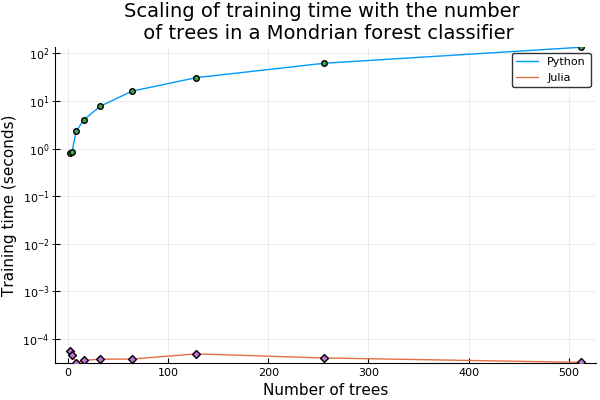

In [10]:
d=5
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

time = []
acc = []
trees = []
for j in collect(1:9)
    push!(trees,2^j)
    MF = Mondrian_Forest_Classifier(2^j)
    tic()
    train!(MF,X,Y,1e9)
    t = toq()
    println(t)
    push!(time,t)
    @time pred=predict!(MF, x);
    push!(acc,correctrate(y,convert(Array{Int,1},pred)))
    println(MF.n_trees)
end

println(time)
println(acc)

using CSV
times_py = convert(Array{Float64,1},CSV.read("comparisons/times_py")[2])
pyplot()

plot(trees,times_py,label="Python", yscale=:log10)
plot!(trees,time,label="Julia", yscale=:log10)
scatter!(trees,times_py,label="")
scatter!(trees,time,label="",markershape=:auto)
title!("Scaling of training time with the number \n of trees in a Mondrian forest classifier")
xlabel!("Number of trees")
ylabel!("Training time (seconds)")